 OBJECTIVE:-
This dataset captures daily coffee sales from a vending machine, covering the period
from March 2024 to the present. In this notebook, we’ll explore the data using
exploratory data analysis (EDA) to uncover customer purchasing habits and sales trends
The goal is to gain useful insights that can help with smarter inventory planning.



IMPORTING LIBRARIES.

In [72]:

#importing all the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



EDA

In [57]:
#loading the dataset
data = pd.read_csv('index.csv')
data.head()
#check for duplicates
data_duplicates = data.duplicated().sum()
data.dtypes


date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [58]:
missing_values = data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
Missing values in cash_type column: 0
Missing values in card column: 89
           date                 datetime cash_type card  money  \
12   2024-03-02  2024-03-02 10:30:35.668      cash  NaN   40.0   
18   2024-03-03  2024-03-03 10:10:43.981      cash  NaN   40.0   
41   2024-03-06  2024-03-06 12:30:27.089      cash  NaN   35.0   
46   2024-03-07  2024-03-07 10:08:58.945      cash  NaN   40.0   
49   2024-03-07  2024-03-07 11:25:43.977      cash  NaN   40.0   
..          ...                      ...       ...  ...    ...   
657  2024-05-31  2024-05-31 09:23:58.791      cash  NaN   39.0   
677  2024-06-01  2024-06-01 20:54:59.267      cash  NaN   39.0   
685  2024-06-02  2024-06-02 22:43:10.636      cash  NaN   34.0   
691  2024-06-03  2024-06-03 21:42:51.734      cash  NaN   34.0   
692  2024-06-03  2024-06-03 21:43:37.471      cash  NaN   34.0   

             coffee_name  
12                 

<Axes: >

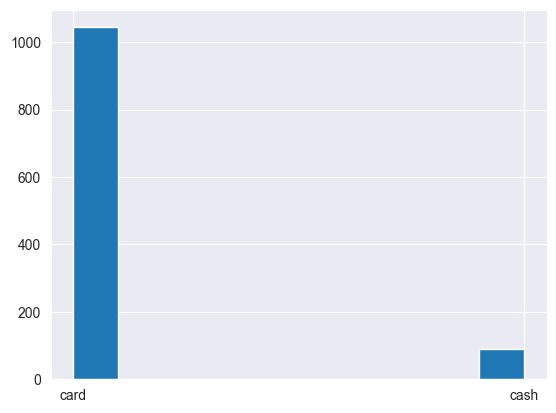

In [59]:
#checking all the missing values.
print(data.columns)
#checking missing values in columns
missing_count = data['cash_type'].isnull().sum()
print(f'Missing values in cash_type column: {missing_count}')
missing_count = data['card'].isnull().sum()
print(f'Missing values in card column: {missing_count}')
#checking missing values in rows
missing_rows = data[data['card'].isnull()]
print(missing_rows)
#ther are total 89 missing values in card column.
#checking the amount of user who paid in cash or card through histogram
data['cash_type'].hist()


                     percentage
coffee_name                    
Americano with Milk       23.65
Latte                     21.45
Cappuccino                17.30
Americano                 14.92
Cortado                    8.74
Hot Chocolate              6.53
Espresso                   4.32
Cocoa                      3.09


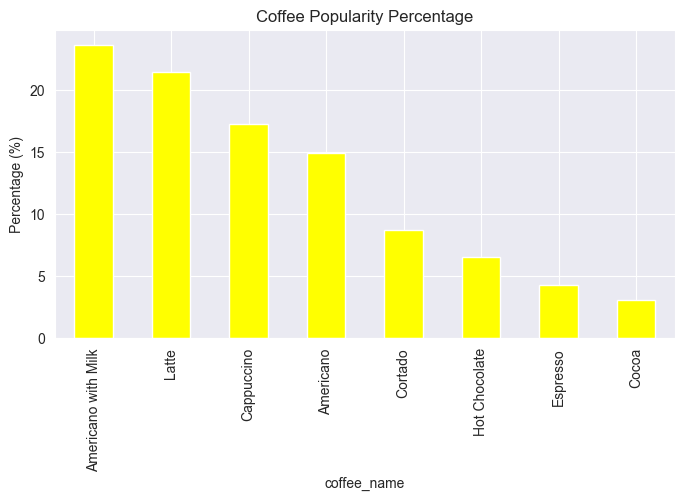

In [60]:
data['cash_type'].value_counts(normalize=True) * 100
#it shows that 92% people paid through card and rest paid with cash

coffee_percent = pd.DataFrame(
data['coffee_name']
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    .round(4) * 100)
coffee_percent.columns = ['percentage']
print(coffee_percent)
#creating bar graph of most selling coffee with their percentage
coffee_percent.plot(kind='bar', legend=False, figsize=(8,4), color='yellow')
plt.title('Coffee Popularity Percentage')
plt.ylabel('Percentage (%)')
plt.show()



converting date and datetime into datetime format using pandas

In [61]:
# For 'date' column (e.g., '2024-07-21')
data['date'] = pd.to_datetime(data['date'])

# For 'datetime' column (e.g., '2024-07-21 10:30:00')
data['datetime'] = pd.to_datetime(data['datetime'])
#Create column of Month, Weekdays, and Hours
data['month']=data['date'].dt.strftime('%Y-%m')
data['day']=data['date'].dt.strftime('%w')
data['hour']=data['datetime'].dt.strftime('%H')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


Data Exploration

In [62]:
#checking the earliest transaction date.
data['date'].min(),data['date'].max()
#checking the latest transaction date.
data['date'].max()

Timestamp('2024-07-31 00:00:00')

DATA ANALYSIS

calculating KPI's.

In [63]:
#calculate total number of orders
data['cash_type'].count()

np.int64(1133)

In [64]:

#no of working days
data['date'].max() - data['date'].min()




Timedelta('152 days 00:00:00')

In [65]:
#average order per day
# Convert date to datetime if not already
data['date'] = pd.to_datetime(data['date'])

# Total orders
total_orders = len(data)

# Unique days
total_days = data['date'].nunique()

# Average orders per day
avg_orders_per_day = total_orders / total_days

print(f'Average orders per day: {avg_orders_per_day:.2f}')


Average orders per day: 7.55


In [66]:
aov = data['money'].sum() / len(data)
print(f'Average Order Value: ${aov:.2f}')


Average Order Value: $33.11


order analysis

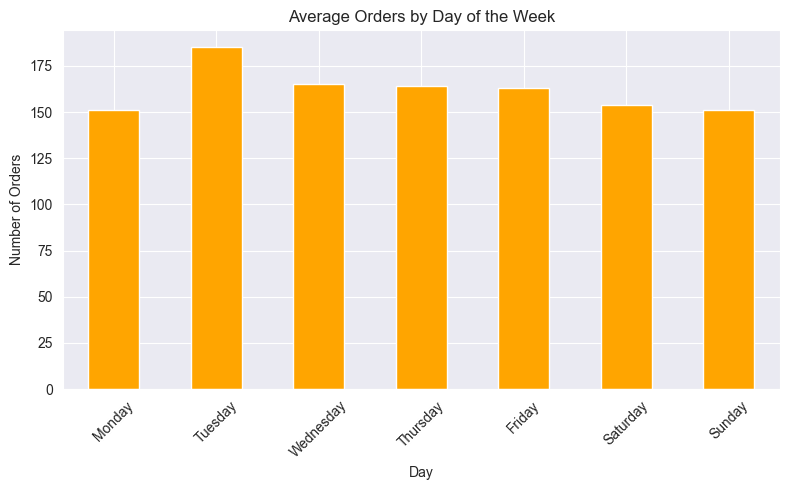

In [67]:
data['day_of_week'] = data['date'].dt.day_name()

orders_by_day = data.groupby('day_of_week').size()

# Optional: order the days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_day = orders_by_day.reindex(days_order)

# Plot of weekly orders.
plt.figure(figsize=(8, 5))
orders_by_day.plot(kind='bar', color='orange')
plt.title('Average Orders by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


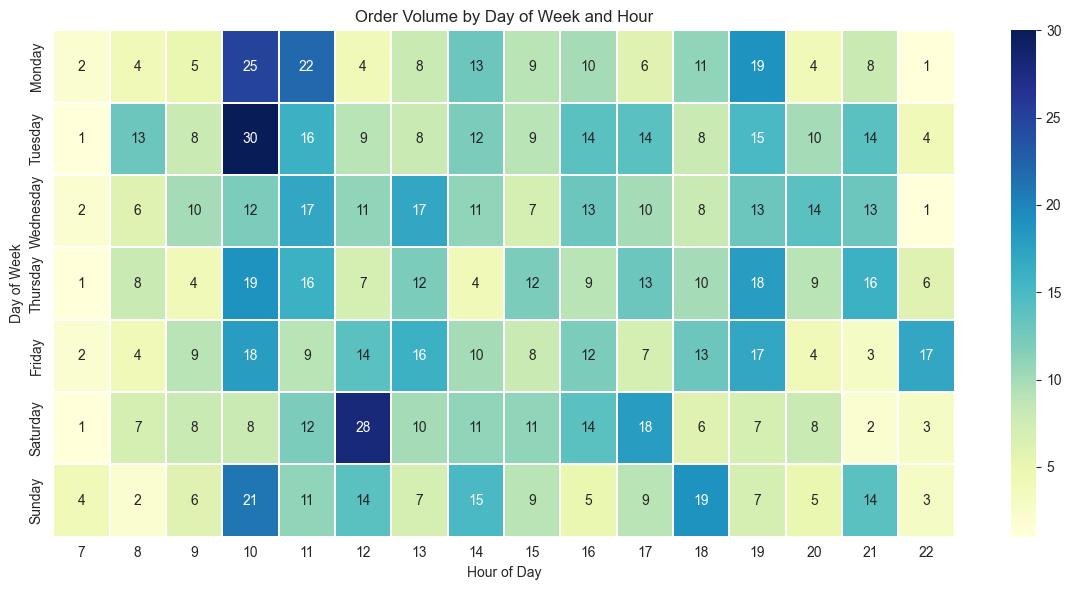

In [68]:
#plot a heat map of the order by day of  week and time
data['day_of_week'] = data['datetime'].dt.day_name()
data['hour'] = data['datetime'].dt.hour
heatmap_data = data.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3, annot=True, fmt='d')
plt.title('Order Volume by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()



In [69]:
#order by product categories
data.groupby(['coffee_name'],).agg(total=('coffee_name', 'count'))

,total
coffee_name,
Americano,169
Americano with Milk,268
Cappuccino,196
Cocoa,35
Cortado,99
Espresso,49
Hot Chocolate,74
Latte,243


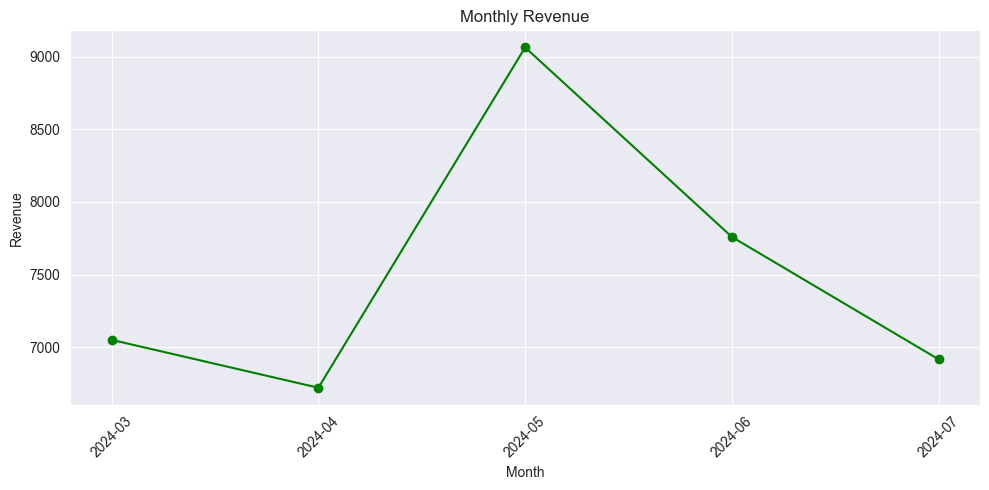

In [70]:
data['month'] = data['datetime'].dt.to_period('M')  # e.g., 2024-07
monthly_revenue = data.groupby('month')['money'].sum().reset_index()
monthly_revenue['month'] = monthly_revenue['month'].astype(str)  # For plotting


plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['month'], monthly_revenue['money'], marker='o', color='green')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Peak hour revenue

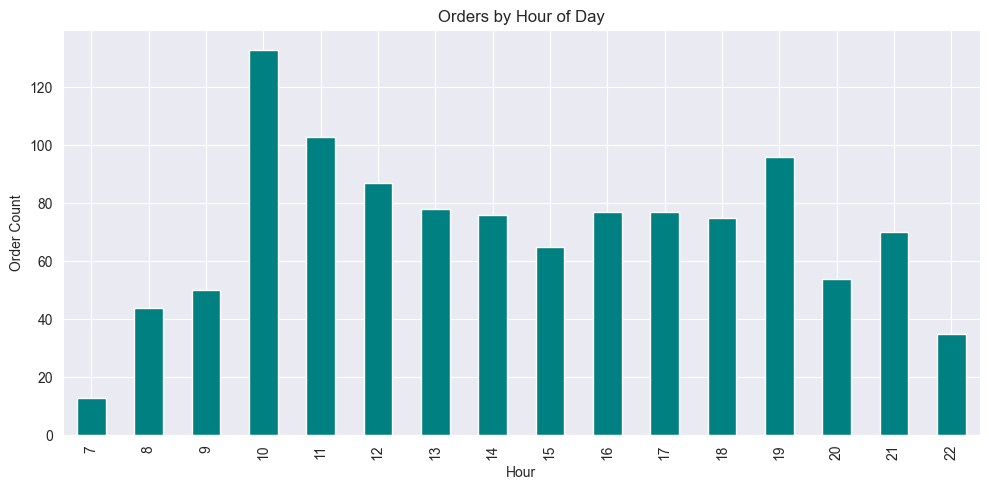

In [71]:
orders_by_hour = data.groupby('hour').size()

plt.figure(figsize=(10,5))
orders_by_hour.plot(kind='bar', color='teal')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()


Conclusion

This exploratory analysis of coffee vending machine data from March 2024 to the present has revealed several useful
business insights:

1. Customer Payment Behavior:
   - A significant majority (~92%) of customers prefer to pay via card, suggesting strong adoption of digital payments.
   - Cash transactions were minimal, yet still important during specific hours (possibly early morning or late evening).

2. Coffee Preferences:
   - Certain coffee types (e.g., Cappuccino, Latte) dominate sales.
   - These top-selling products can be prioritized in inventory stocking and promotions.

3. Sales Trends Over Time:
   - Revenue and order volume vary by day of week and time of day, with noticeable peaks during morning hours and weekdays.
   - A heatmap of order volume shows highest activity between 8 AM – 11 AM, especially on weekdays, aligning with
     office-going customer patterns.

4. Monthly Performance:
   - Monthly revenue tracking shows how business is trending over time — ideal for identifying growth, dips, or seasonal patterns.

5. Average Metrics:
   - The average number of orders per day provides a clear baseline for machine performance.
   - Average Order Value (AOV) gives a sense of individual transaction profitability.



 Final Note:
This analysis helps support data-driven decisions for inventory planning, pricing strategy, and product placement.

